**STANDARDIZATION**

In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

In [3]:
df=df.iloc[:,2:]

In [4]:
df.sample(5)

,Age,EstimatedSalary,Purchased
88,26,81000,0
42,35,108000,0
309,38,50000,0
300,58,38000,1
260,35,77000,0


**Train test split**

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((280, 2), (120, 2))

**Standard Scalar**

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#fit the scaler to the train set,it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [7]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [8]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_test_scaled

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


In [9]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [10]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


**Effect of Scaling**

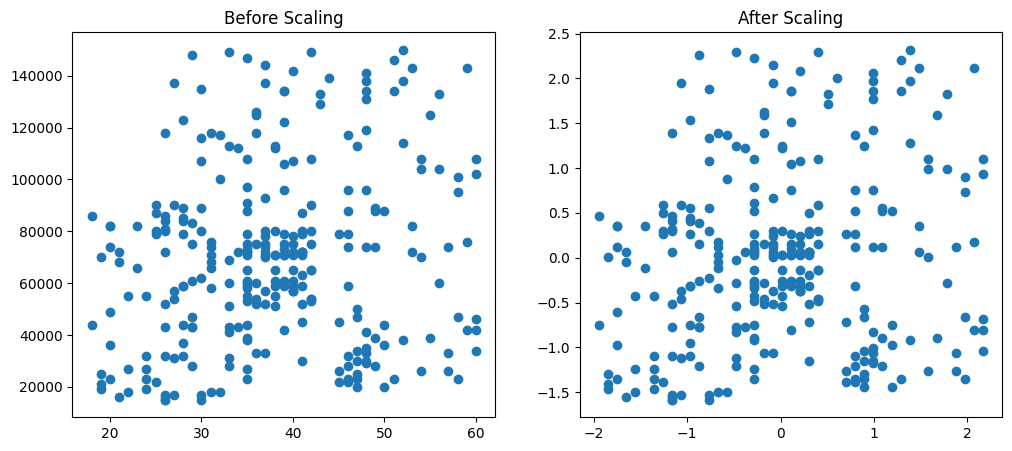

In [11]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'])
ax2.set_title("After Scaling")
plt.show()



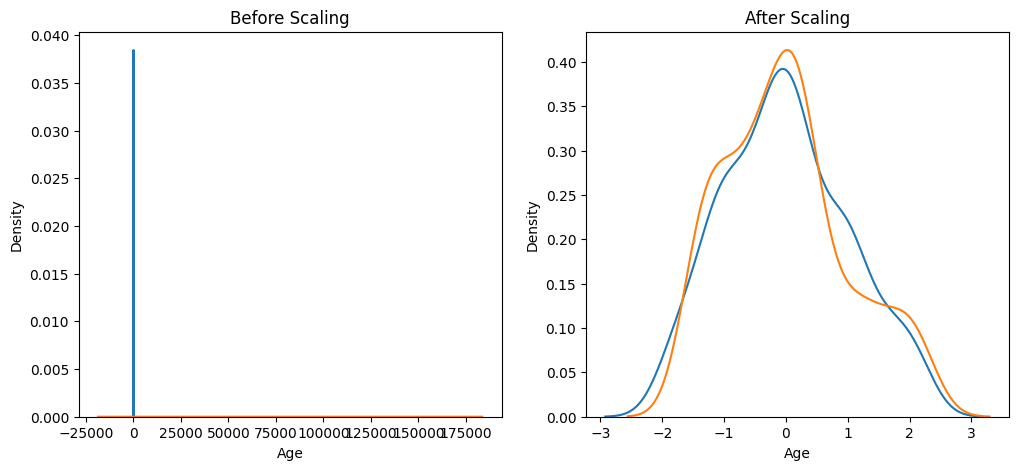

In [12]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))

sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)
ax1.set_title("Before Scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
ax2.set_title("After Scaling")
plt.show()


**Why scaling is important?**

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [15]:
lr.fit(X_train,Y_train)
lr_scaled.fit(X_train_scaled,Y_train)

LogisticRegression()

In [16]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
print("Actual",accuracy_score(Y_test,y_pred))
print("Scaled",accuracy_score(Y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [19]:
from sklearn.tree import DecisionTreeClassifier


In [20]:
dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()

In [22]:
dt.fit(X_train,Y_train)
dt_scaled.fit(X_train_scaled,Y_train)

DecisionTreeClassifier()

In [23]:
y_pred=dt.predict(X_test)
y_pred_scaled=dt_scaled.predict(X_test_scaled)

In [24]:
print("Actual",accuracy_score(Y_test,y_pred))
print("Scaled",accuracy_score(Y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [25]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


**Effect of outlier**

In [39]:
new=pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[100,250000,350000],'Purchased':[0,1,1]})

In [43]:
df=pd.concat([df,new],ignore_index=True)

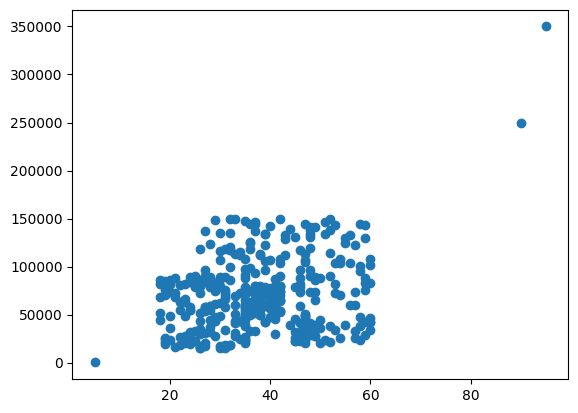

In [44]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((282, 2), (121, 2))

In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#fit the scaler to the train set,it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [47]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_test_scaled

,Age,EstimatedSalary
0,-0.287399,-1.335227
1,0.351481,0.166139
2,-0.561205,1.355900
3,-0.926279,0.506071
4,-1.291353,-0.315431
...,...,...
116,-0.287399,-1.250244
117,-0.378667,-1.250244
118,-0.287399,-0.542053
119,-0.104862,-0.343759


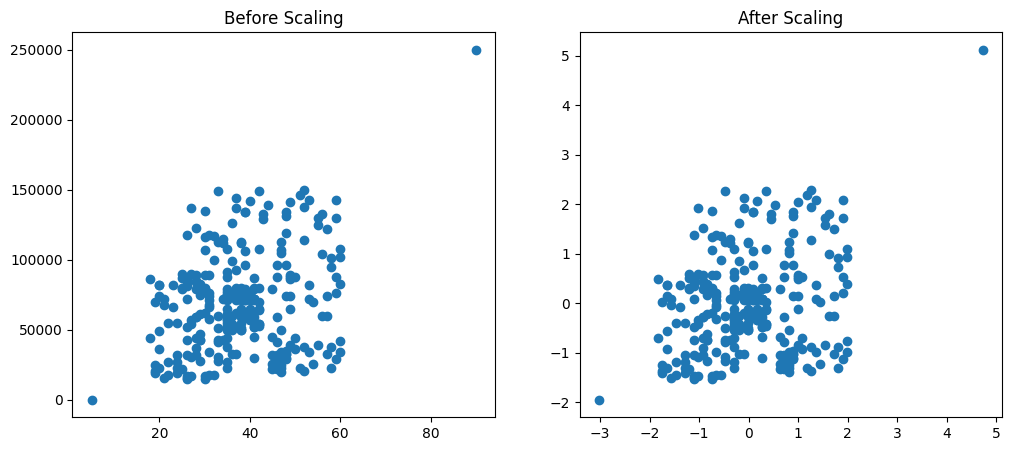

In [48]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'])
ax2.set_title("After Scaling")
plt.show()